# 0. Introduction

The decision to create this notebook is to register and test **Exploratory Data Analysis** approaches and develop machine learning classification models to classify the placement of students in **Campus Recruitment** dataset.

This notebook has **3** main sections: **Exploratory Data Analysis**, **Feature Engineering** and **Model**.

To access the Campus Recruitment dataset, [click here](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).

# 1. Import Libraries and Modules

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 2. Loading data

In [2]:
data_path = "../data/Placement_Data_Full_Class.csv"
df_campus = pd.read_csv(data_path)

print("Number of Students = {}".format(df_campus.shape[0]))
print("Campus Recruitment Dataset Shape = {}\n".format(df_campus.shape))
print(df_campus.columns)

Number of Students = 215
Campus Recruitment Dataset Shape = (215, 15)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


# 3. Exploratory Data Analysis

## 3.1 Overview
* `sl_no` is the unique id of the row and it does not have any in target variable.
* `gender` is self-explanatory.
* `ssc_p` is the Secondary Education percentage (10th Grade).
* `hsc_p` is the Higher Secondary Education percentage (12th Grade).
* `ssc_b`, `hsc_p` is the Board of Education, respectively for secondary education and higher secondary. Their categories are:
    * **Others**
    * **Central**
* `hsc_s` represents in Specialization in Higher Secondary Education. Their values are:
    * **Commerce**
    * **Science**
    * **Other**
* `degree_p` is the Degree Percentage.
* `degree_t` is the Under Graduation Degree types:
    * **Comm&Mgmt**
    * **Sci&Tech**
    * **Other**
* `workex` represents if the student has work experience.
* `etest_p` represent Employability test percentage conducted by college.
* `specialization` represents the Post Graduation (MBA) type:
    * **Mkt&HR**
    * **Mkt&Fin**
* `mba_p`is the MBA percentage.
* `status` is the status of placement (**target**):
    * **Placed**
    * **Not placed**
* `salary` offered by corporate to candidate.

In [3]:
print(df_campus.info())
df_campus.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
104,105,M,69.0,Central,63.0,Others,Science,65.0,Comm&Mgmt,Yes,55.0,Mkt&HR,58.23,Placed,360000.0
110,111,F,69.5,Central,70.0,Central,Science,72.0,Sci&Tech,No,57.2,Mkt&HR,54.80,Placed,250000.0
101,102,M,63.0,Central,72.0,Central,Commerce,68.0,Comm&Mgmt,No,78.0,Mkt&HR,60.44,Placed,380000.0
138,139,F,82.0,Others,64.0,Others,Science,73.0,Sci&Tech,Yes,96.0,Mkt&Fin,71.77,Placed,250000.0


## 3.2 Missing values
As seen in last subsection, `salary` has some null values. Before fill the values lets explore the null data.
First, lets create a column `has_salary` that indicates if the student has a salary (**output: 1**) or not (**output: 0**), and then .

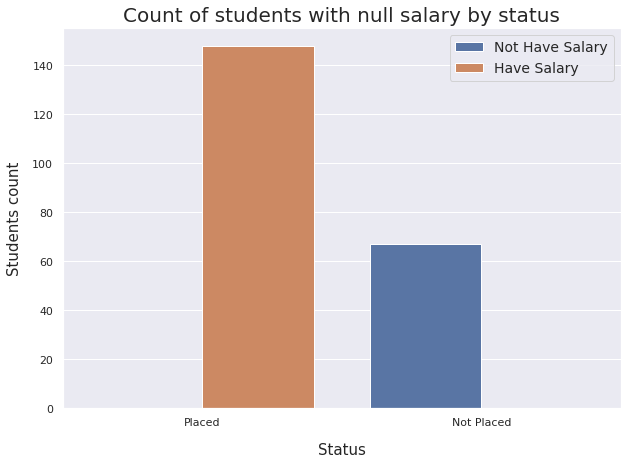

In [4]:
null_salary = df_campus["salary"].isnull()
index_null_salary = df_campus[null_salary].index

df_campus["has_salary"] = 1
df_campus.loc[index_null_salary, "has_salary"] = 0

plt.figure(figsize=(10, 7))
sns.countplot(x="status", hue="has_salary", data=df_campus)

plt.title("Count of students with null salary by status", size=20)
plt.xlabel("Status", size=15, labelpad=15)
plt.ylabel("Students count", size=15, labelpad=10)

plt.legend(["Not Have Salary", "Have Salary"], loc="upper right",
           prop={"size": 14})

plt.show()

Based on chart above, the `salary`feature only has values if the student is placed, so the salary feature will not be used to train the model.

## 3.3 Target distribution

In [5]:
df_campus["status"].replace("Placed", 1, inplace=True)
df_campus["status"].replace("Not Placed", 0, inplace=True)

148 of 215 students were placed and it is the 68.84% of the dataset.
67 of 215 students were not placed and it is 31.16% of the dataset.


Text(0.5, 1.05, 'Students Placement Distribution')

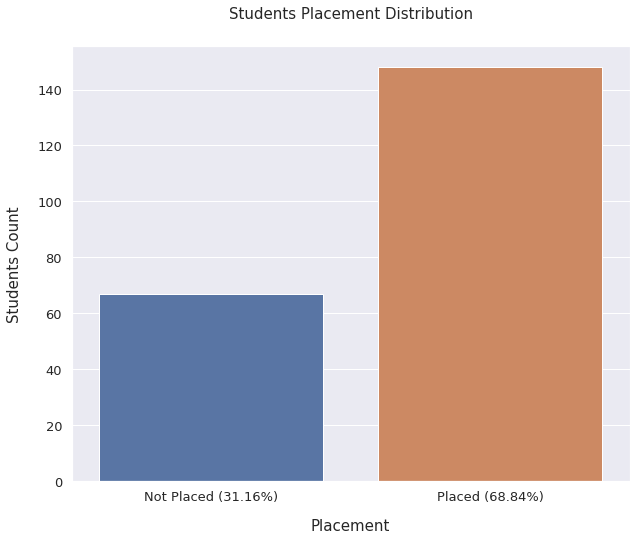

In [6]:
placed = df_campus["status"].value_counts()[1]
not_placed = df_campus["status"].value_counts()[0]
placed_percentage = placed / df_campus.shape[0] * 100
not_placed_percentage = not_placed / df_campus.shape[0] * 100

print("{} of {} students were placed and " \
      "it is the {:.2f}% of the dataset." \
      .format(placed, df_campus.shape[0], placed_percentage))
print("{} of {} students were not placed and " \
      "it is {:.2f}% of the dataset." \
      .format(not_placed, df_campus.shape[0], not_placed_percentage))

plt.figure(figsize=(10, 8))
sns.countplot(df_campus["status"])

plt.xlabel("Placement", size=15, labelpad=15)
plt.ylabel("Students Count", size=15, labelpad=15)
plt.xticks((0, 1), \
           ["Not Placed ({0:.2f}%)".format(not_placed_percentage), \
           "Placed ({0:.2f}%)".format(placed_percentage)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title("Students Placement Distribution", size=15, y=1.05)

## 3.4 Correlations

In [7]:
df_campus_corr = df_campus.drop(["sl_no", "salary", "has_salary"],
                                axis=1) \
                          .corr().abs().unstack() \
                          .sort_values(kind="quicksort", 
                                       ascending=False) \
                          .reset_index()

df_campus_corr.rename(columns={"level_0": "Feature 1",
                               "level_1": "Feature 2",
                               0: "Correlation Coefficient"},
                      inplace=True)

df_campus_corr.drop(df_campus_corr.iloc[1::2].index, inplace=True)
corr = df_campus_corr["Correlation Coefficient"] == 1.0
df_campus_corr_nd = df_campus_corr \
                    .drop(df_campus_corr[corr].index)

In [8]:
# Campus set high correlations
corr = df_campus_corr_nd["Correlation Coefficient"] > 0.1
df_campus_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,ssc_p,status,0.607889
8,degree_p,ssc_p,0.538404
10,hsc_p,ssc_p,0.511472
12,status,hsc_p,0.491228
14,degree_p,status,0.479861
16,degree_p,hsc_p,0.434206
18,degree_p,mba_p,0.402364
20,ssc_p,mba_p,0.388478
22,hsc_p,mba_p,0.354823
24,ssc_p,etest_p,0.261993


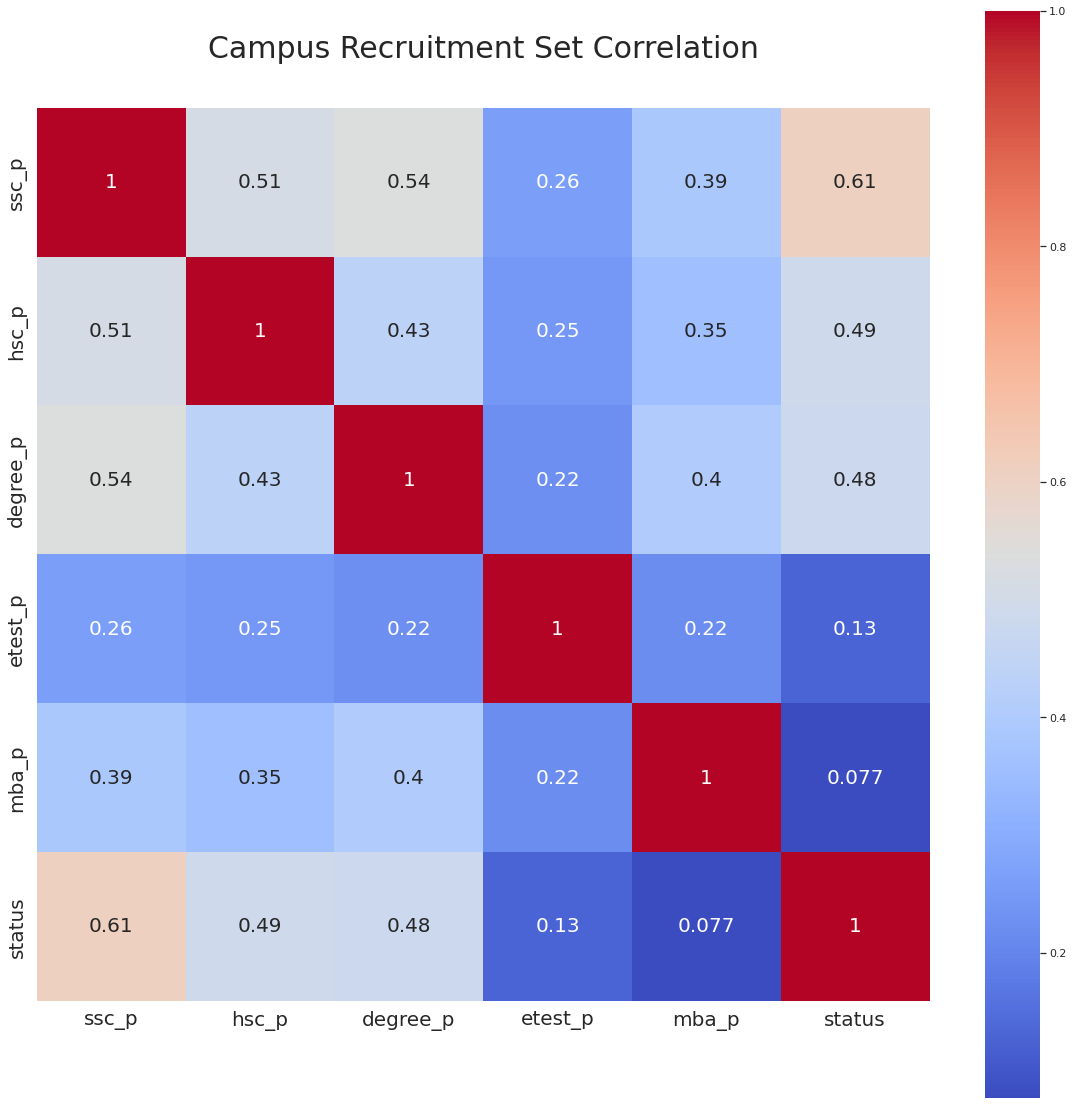

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_campus.drop(["sl_no", "salary", "has_salary"], axis=1)
            .corr(), annot=True, square=True, cmap="coolwarm",
            annot_kws={"size": 20})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Campus Recruitment Set Correlation", fontsize=30, y=1.05)

plt.show()

## 3.5 Target Distribution in Features

### 3.5.1 Continuous Features

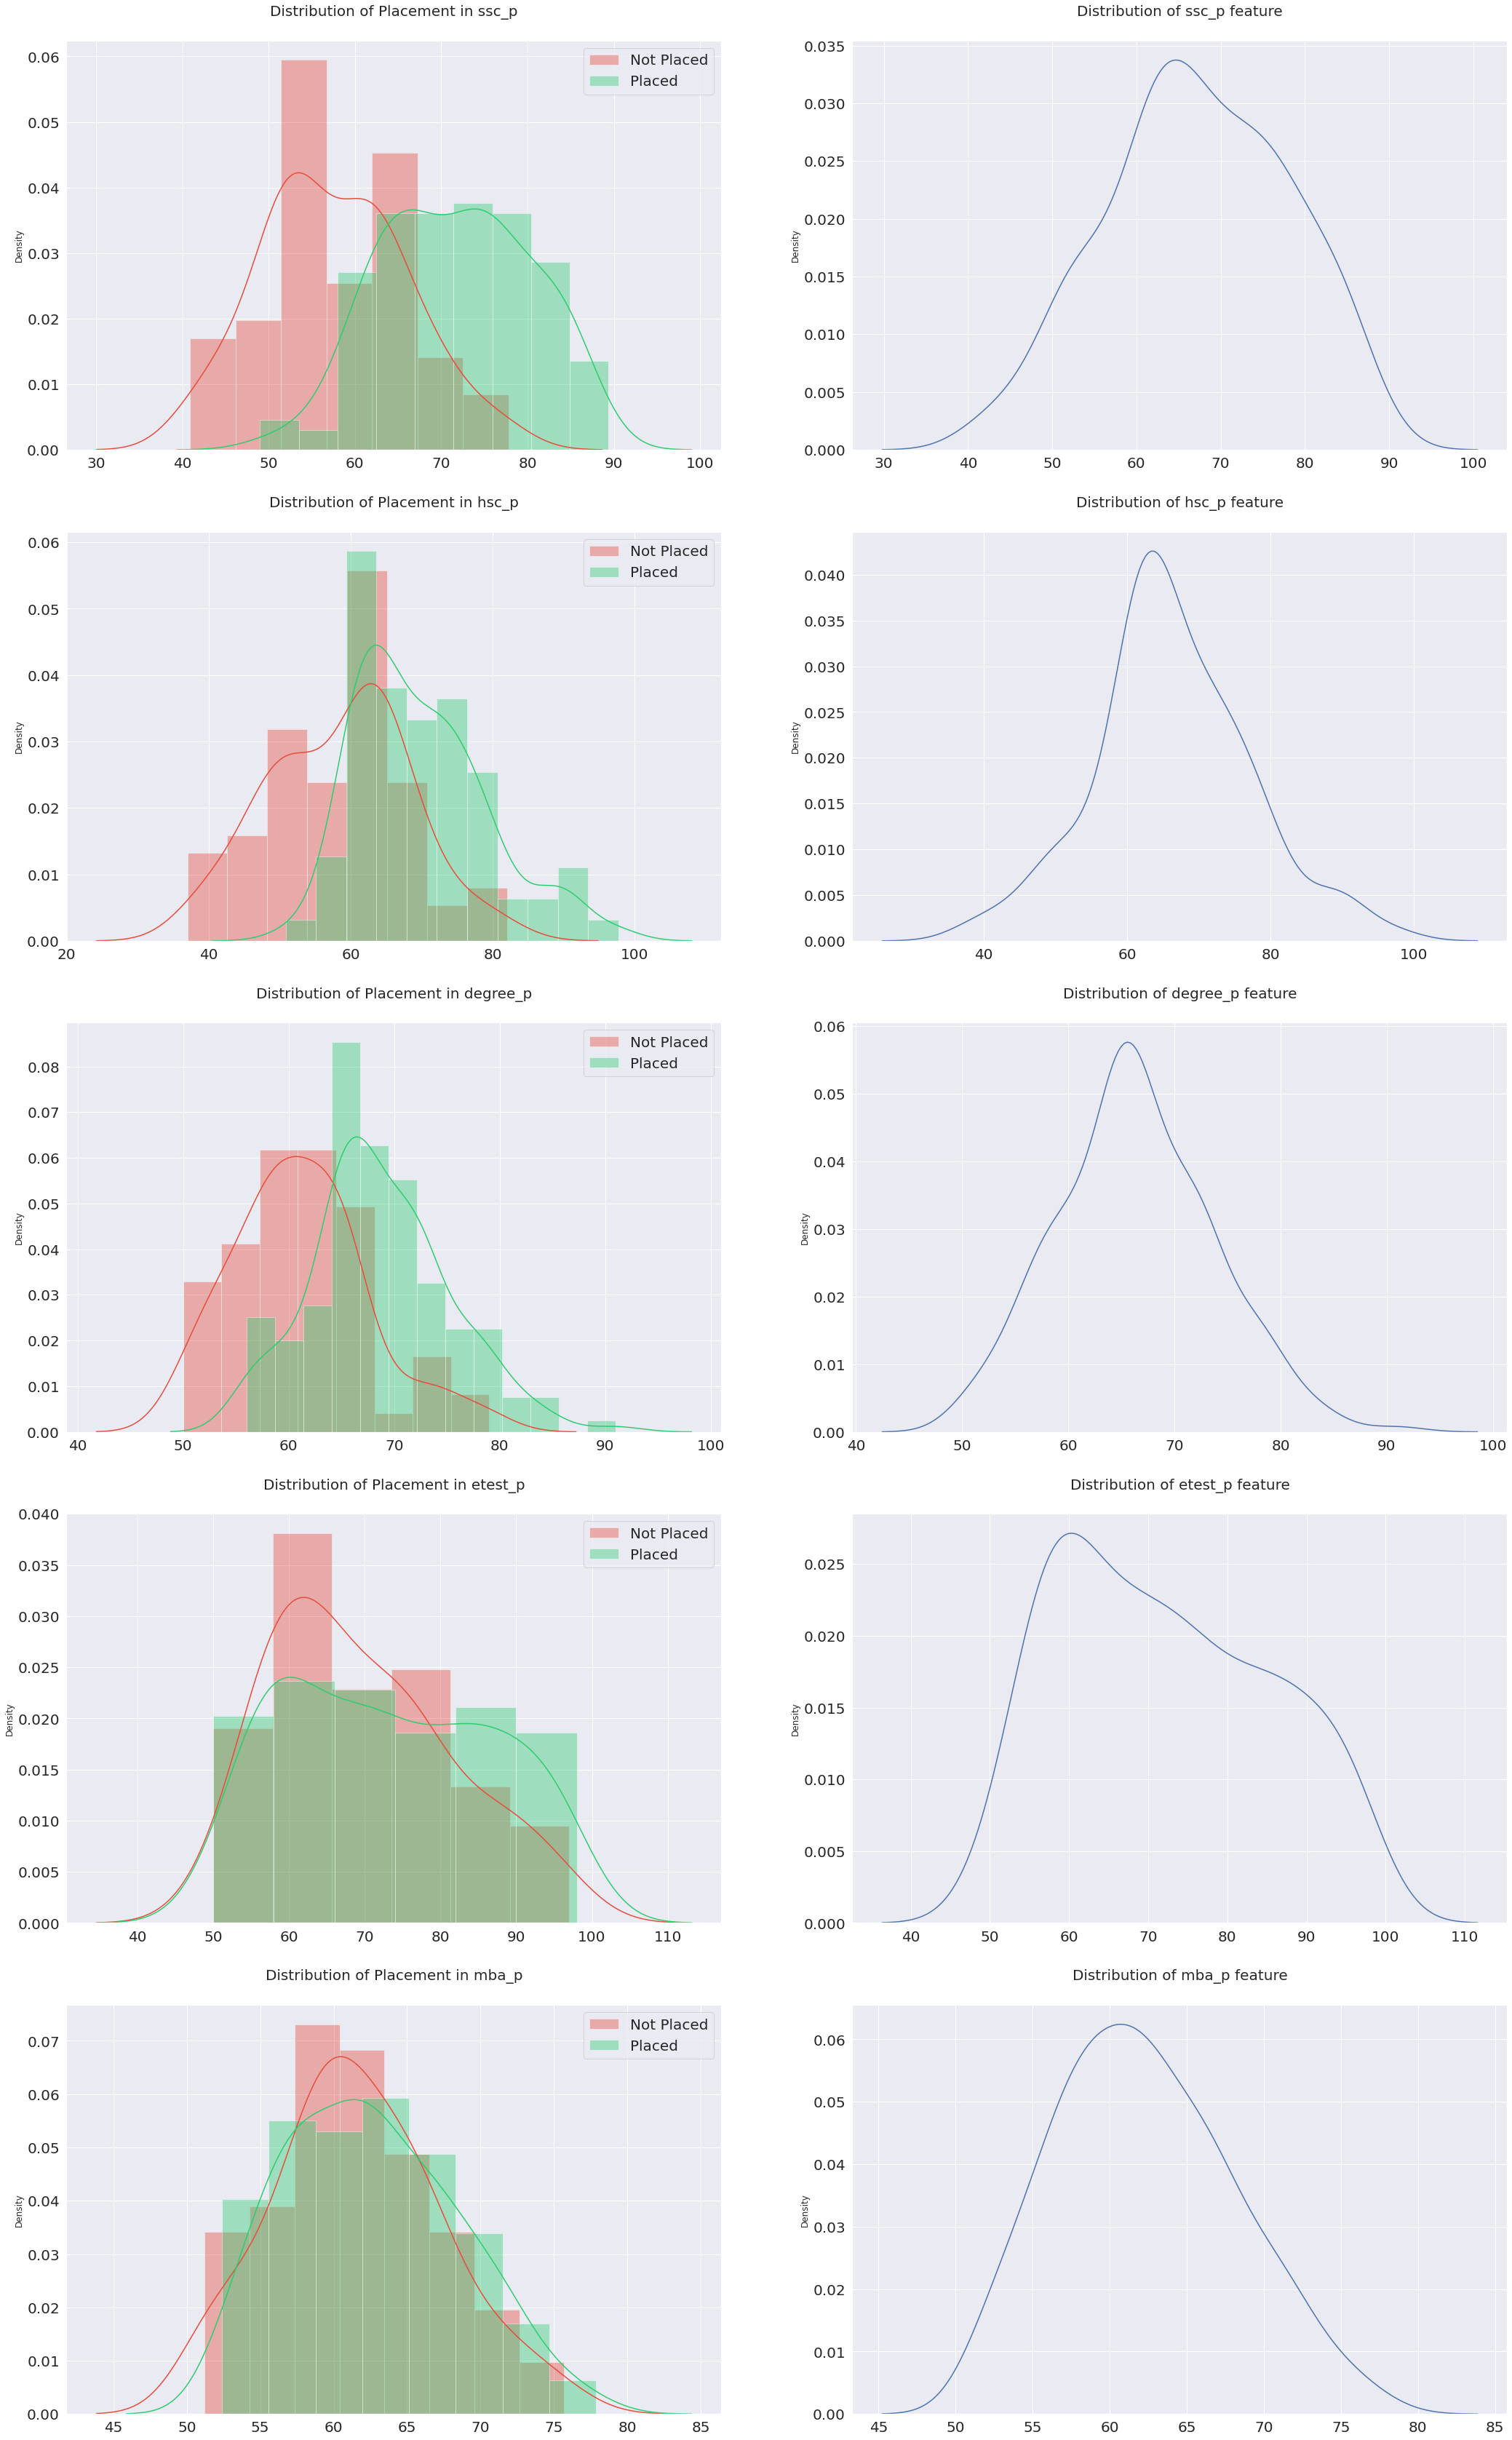

In [10]:
continuous_features = ["ssc_p", "hsc_p", "degree_p", "etest_p",
                       "mba_p"]
placed = df_campus["status"] == 1

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 60))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(continuous_features):
    # Distribution of placement in feature
    sns.distplot(df_campus[~placed][feature], label="Not Placed",
                 hist=True, color="#e74c3c", ax=axs[i][0])
    sns.distplot(df_campus[placed][feature], label="Placed",
                 hist=True, color="#2ecc71", ax=axs[i][0])
    
    # Distribution of feature in dataset
    sns.distplot(df_campus[feature], hist=False, ax=axs[i][1])
    
    axs[i][0].set_xlabel("")
    axs[i][1].set_xlabel("")
    
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        
    axs[i][0].legend(loc="upper right", prop={"size": 20})
    
    axs[i][0].set_title("Distribution of Placement in {}" \
                        .format(feature), size=20, y=1.05)
    axs[i][1].set_title("Distribution of {} feature" \
                        .format(feature), size=20, y=1.05)
plt.show()

* Distribution of `ssc_p` feature clearly shows that students with Secondary Education percentage above 70 have a higher placement rate than any of the other group percentages.
* In distribution of `hsc_p` feature, the placement rate is higher above 70.
* In distribution of `degree_p` and `mba_p` feature, the placement rate is higher above 65.
* In distribution of `etest_p` feature, the placement rate is higher above 80.

### 3.5.2 Categorical Features

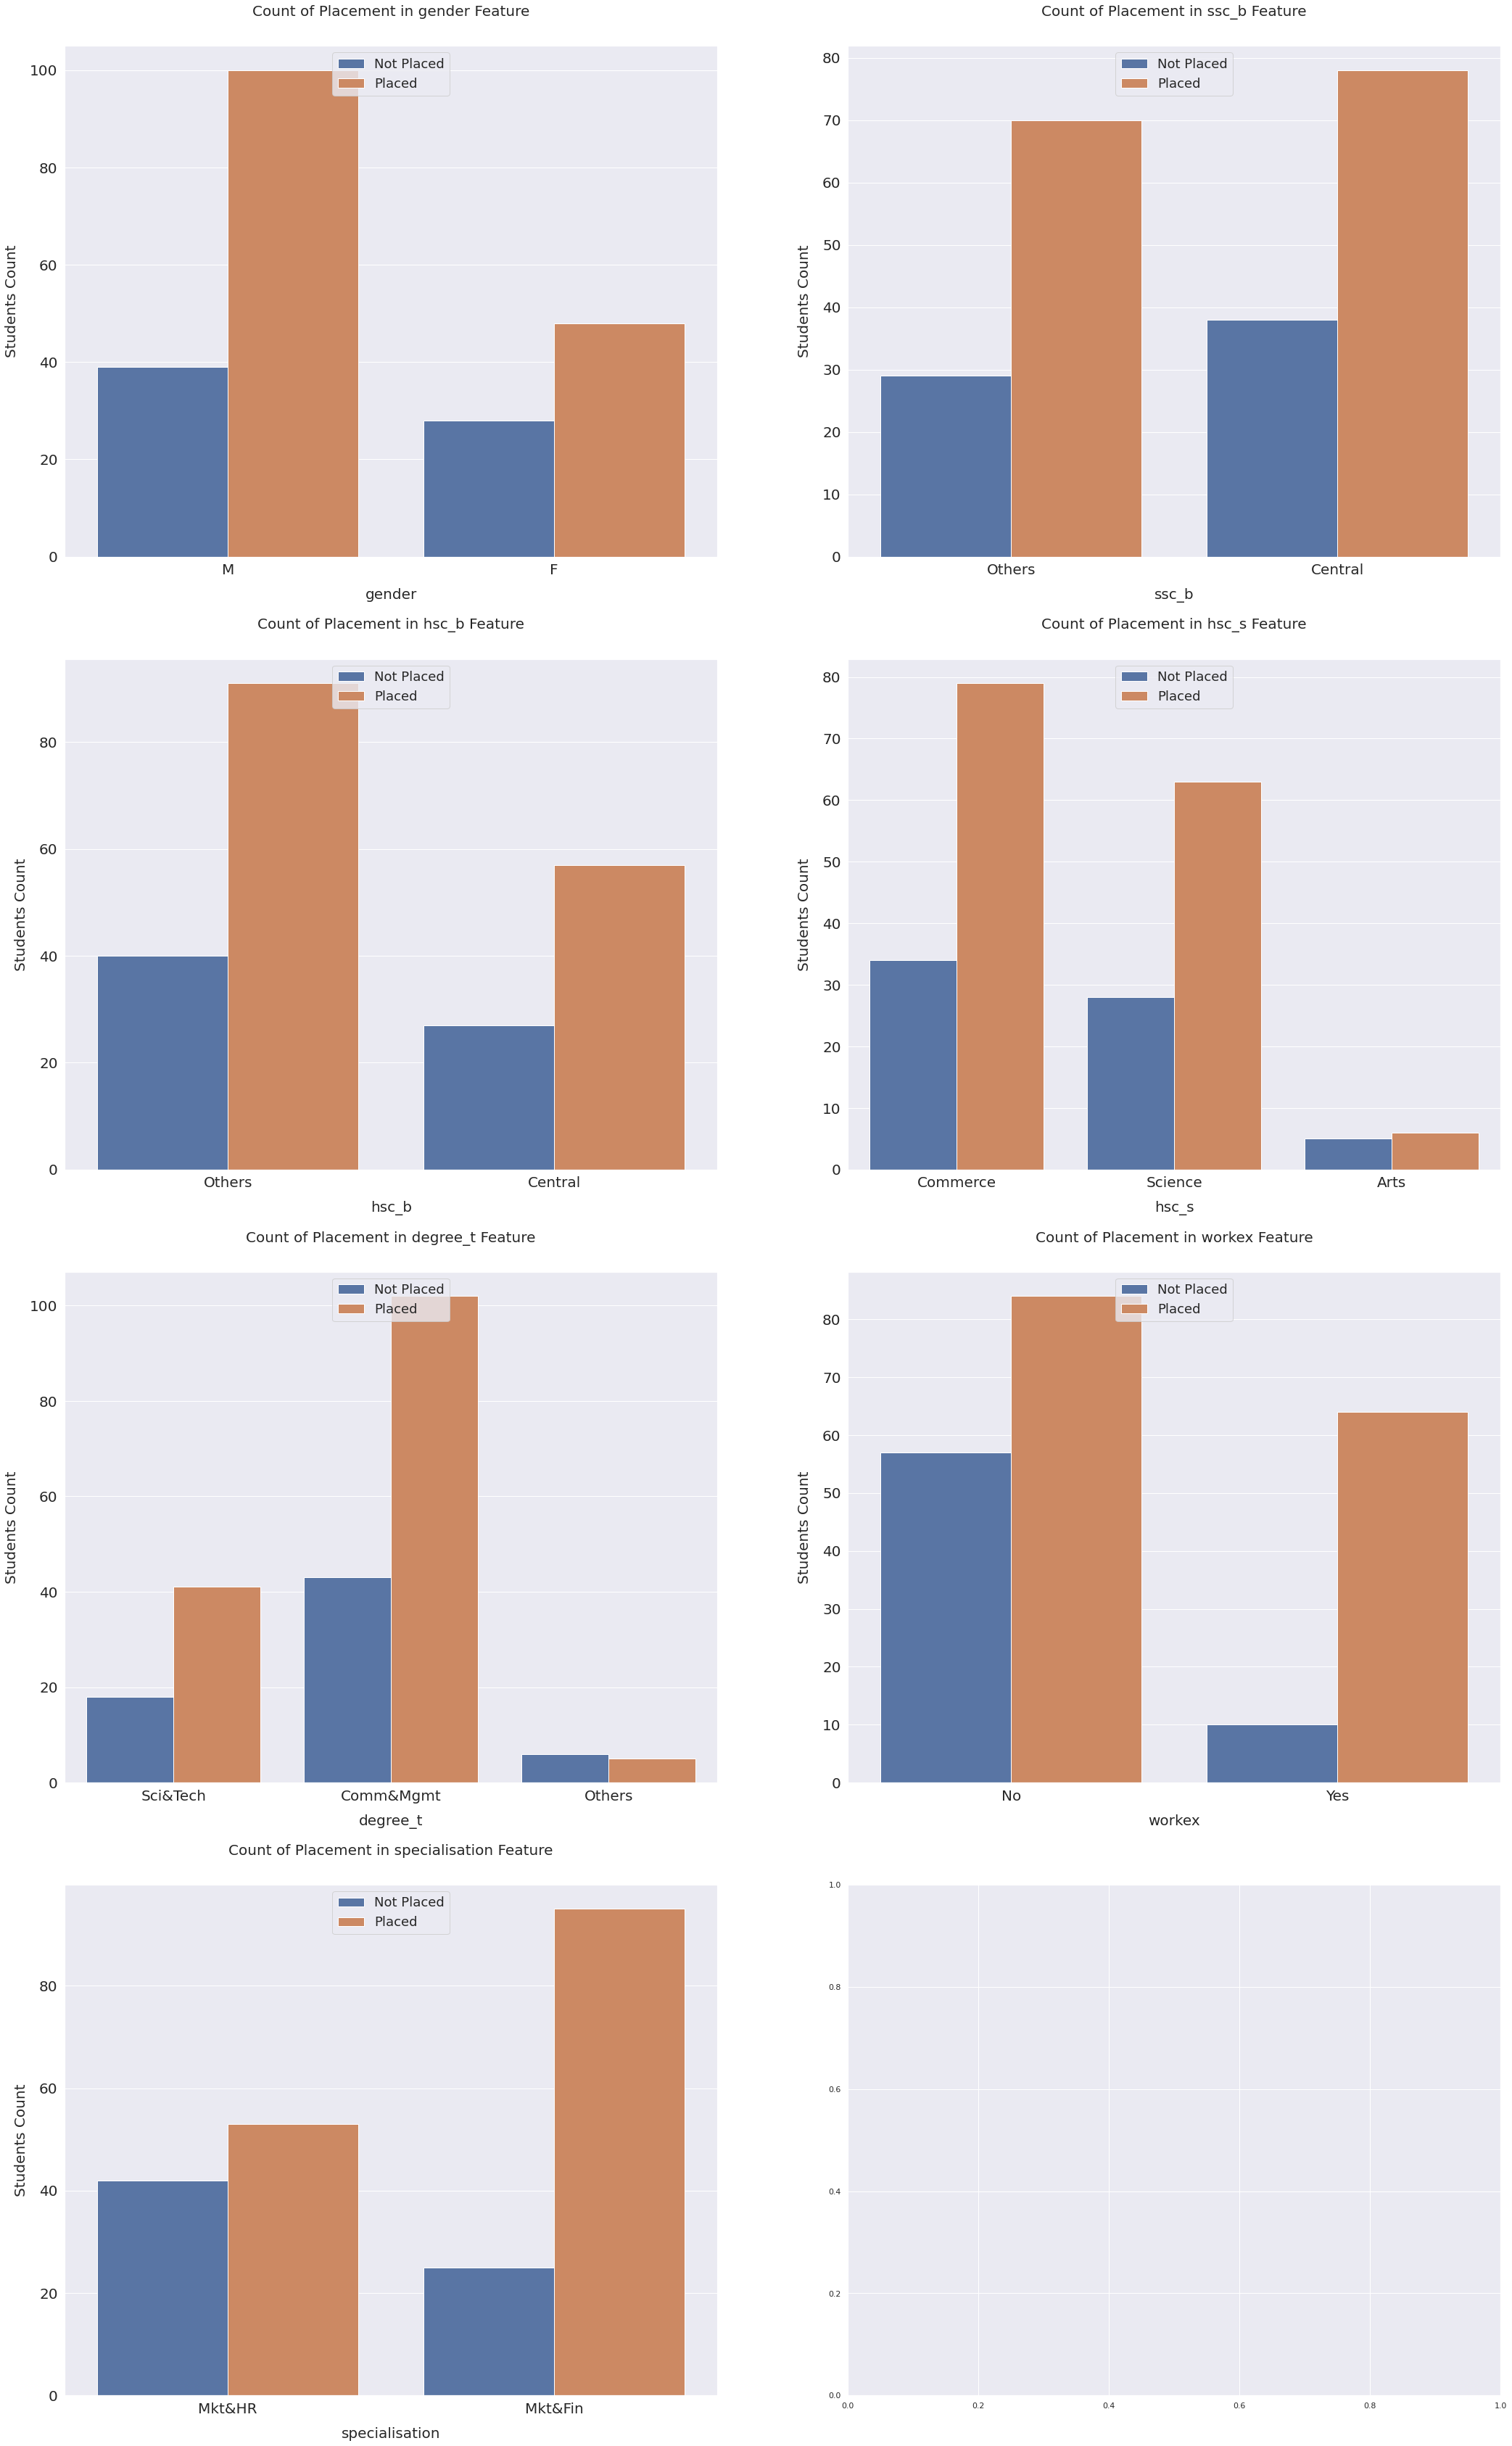

In [11]:
categorical_features = ["gender", "ssc_b", "hsc_b", "hsc_s",
                        "degree_t", "workex", "specialisation"]

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 40))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, hue="status", data=df_campus)
    
    plt.xlabel("{}".format(feature), size=20, labelpad=15)
    plt.ylabel("Students Count", size=20, labelpad=15)
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    
    plt.legend(["Not Placed", "Placed"], loc="upper center",
               prop={"size": 18})
    plt.title("Count of Placement in {} Feature"
              .format(feature), size=20, y=1.05)

plt.show()

* Students with previous work experience have higher chances than with that with no experience. This observation is related to `workex` feature.
* Male students has higher chances to be placed than female ones.

# 4. Feature Engineering

## 4.1 Binning Continuous Features

### 4.1.1 ssc_p

In [12]:
df_campus["ssc_p_bin"] = pd.qcut(df_campus["ssc_p"], 8)

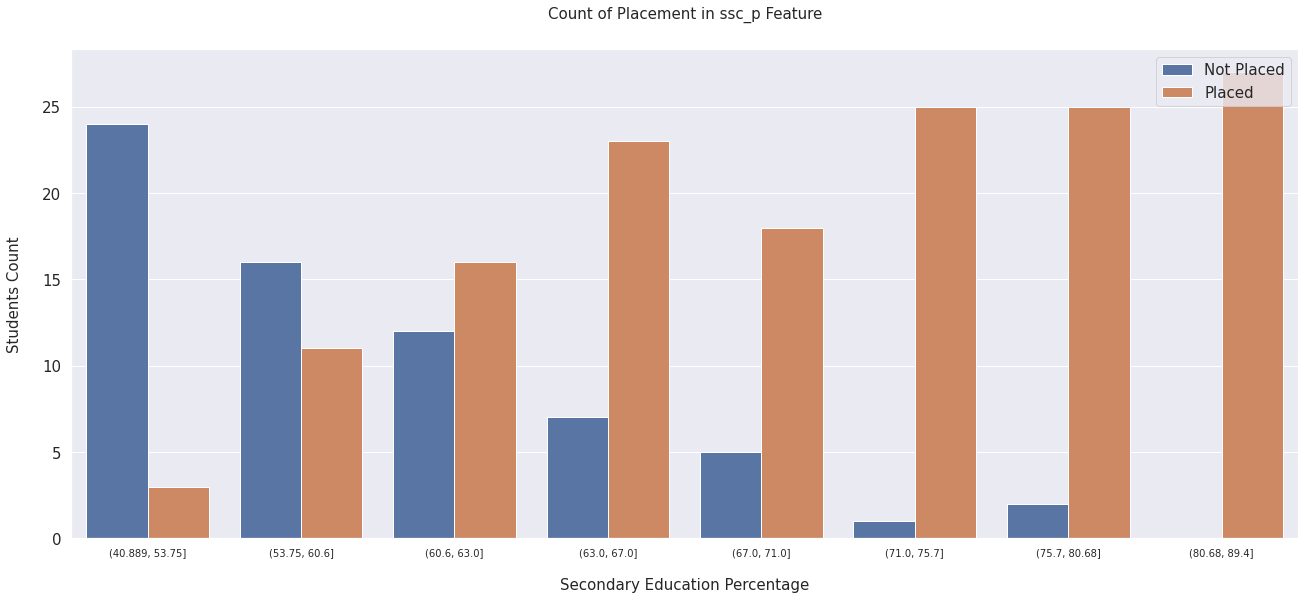

In [13]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="ssc_p_bin", hue="status", data=df_campus)

plt.xlabel("Secondary Education Percentage", size=15, labelpad=20)
plt.ylabel("Students Count", size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(["Not Placed", "Placed"], loc="upper right",
           prop={"size": 15})
plt.title("Count of Placement in {} Feature".format("ssc_p"), 
          size=15, y=1.05)

plt.show()

### 4.1.2 hsc_p

In [14]:
df_campus["hsc_p_bin"] = pd.qcut(df_campus["hsc_p"], 4)

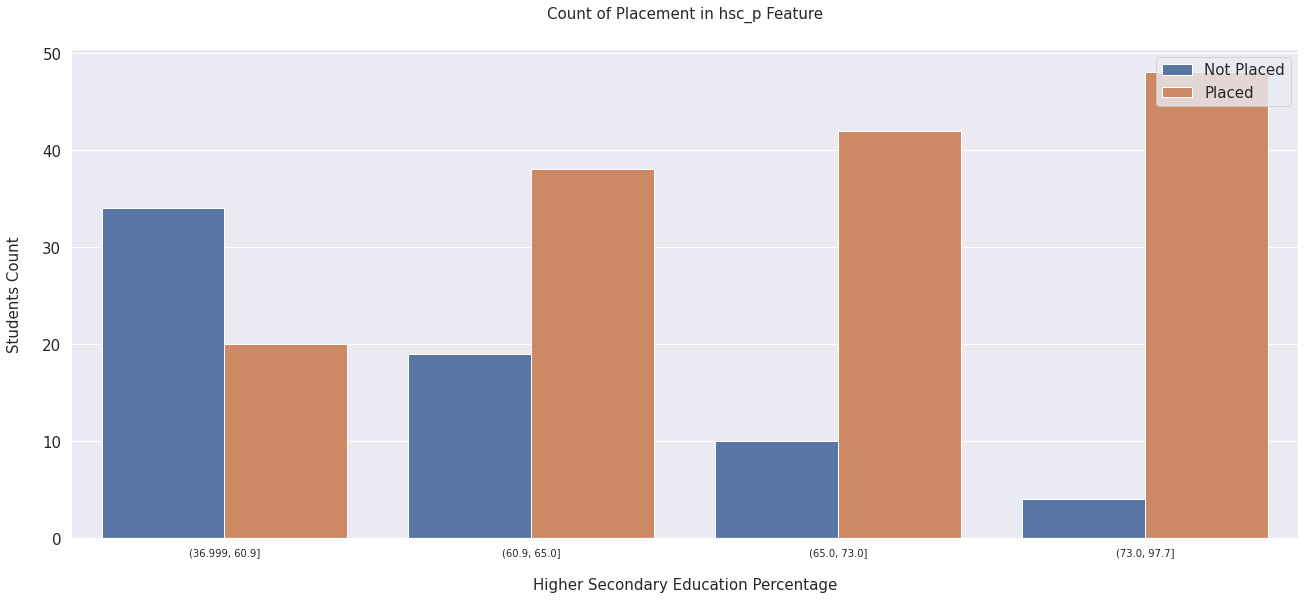

In [15]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="hsc_p_bin", hue="status", data=df_campus)

plt.xlabel("Higher Secondary Education Percentage", size=15,
           labelpad=20)
plt.ylabel("Students Count", size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(["Not Placed", "Placed"], loc="upper right",
           prop={"size": 15})
plt.title("Count of Placement in {} Feature".format("hsc_p"), 
          size=15, y=1.05)

plt.show()

### 4.1.3 degree_p

In [16]:
df_campus["degree_p_bin"] = pd.qcut(df_campus["degree_p"], 6)

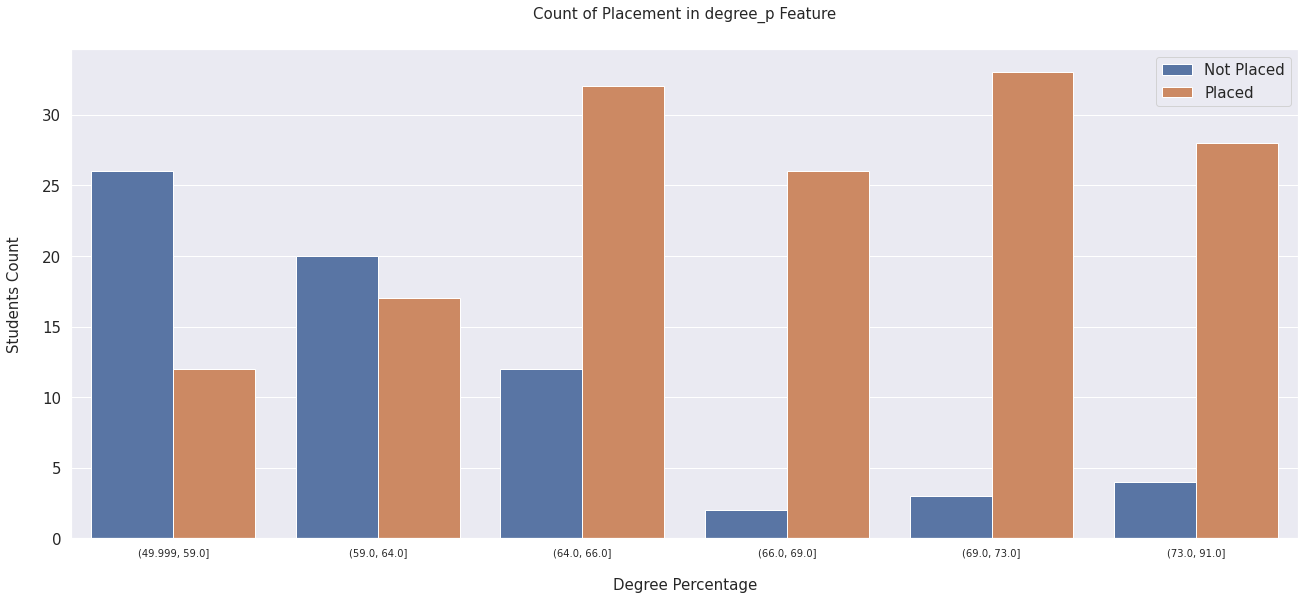

In [17]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="degree_p_bin", hue="status", data=df_campus)

plt.xlabel("Degree Percentage", size=15,
           labelpad=20)
plt.ylabel("Students Count", size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(["Not Placed", "Placed"], loc="upper right",
           prop={"size": 15})
plt.title("Count of Placement in {} Feature".format("degree_p"), 
          size=15, y=1.05)

plt.show()

### 4.1.4 etest_p

In [18]:
df_campus["etest_p_bin"] = pd.qcut(df_campus["etest_p"], 8)

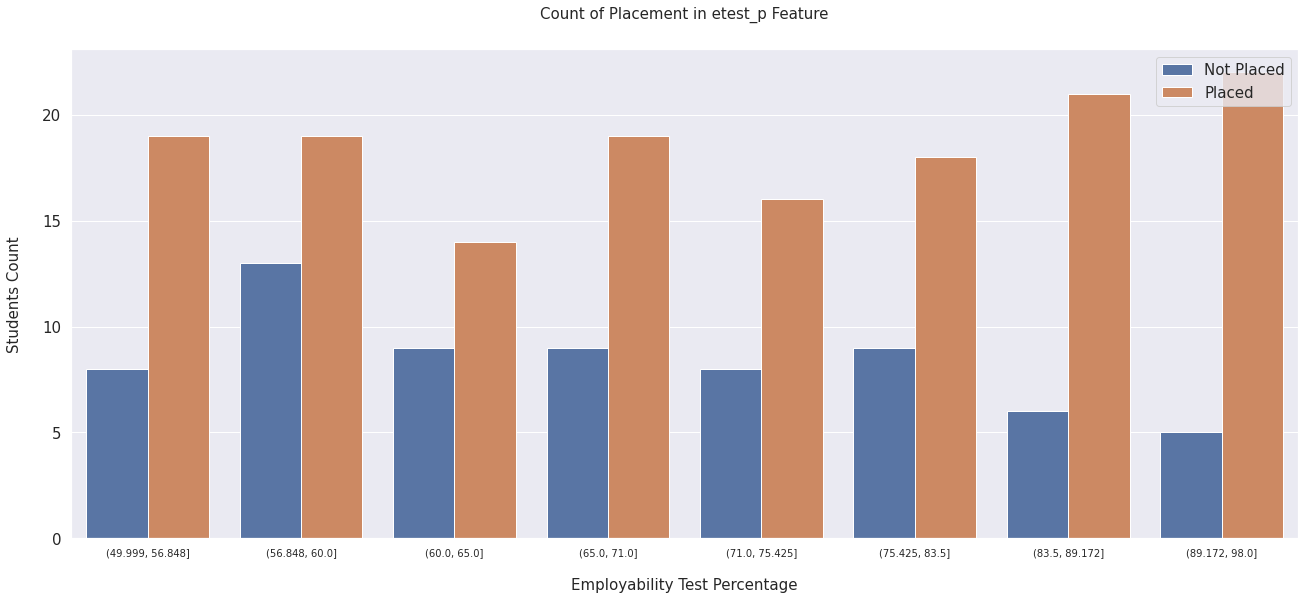

In [19]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="etest_p_bin", hue="status", data=df_campus)

plt.xlabel("Employability Test Percentage", size=15,
           labelpad=20)
plt.ylabel("Students Count", size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(["Not Placed", "Placed"], loc="upper right",
           prop={"size": 15})
plt.title("Count of Placement in {} Feature".format("etest_p"), 
          size=15, y=1.05)

plt.show()

### 4.1.5 mba_p

In [20]:
df_campus["mba_p_bin"] = pd.qcut(df_campus["mba_p"], 10)

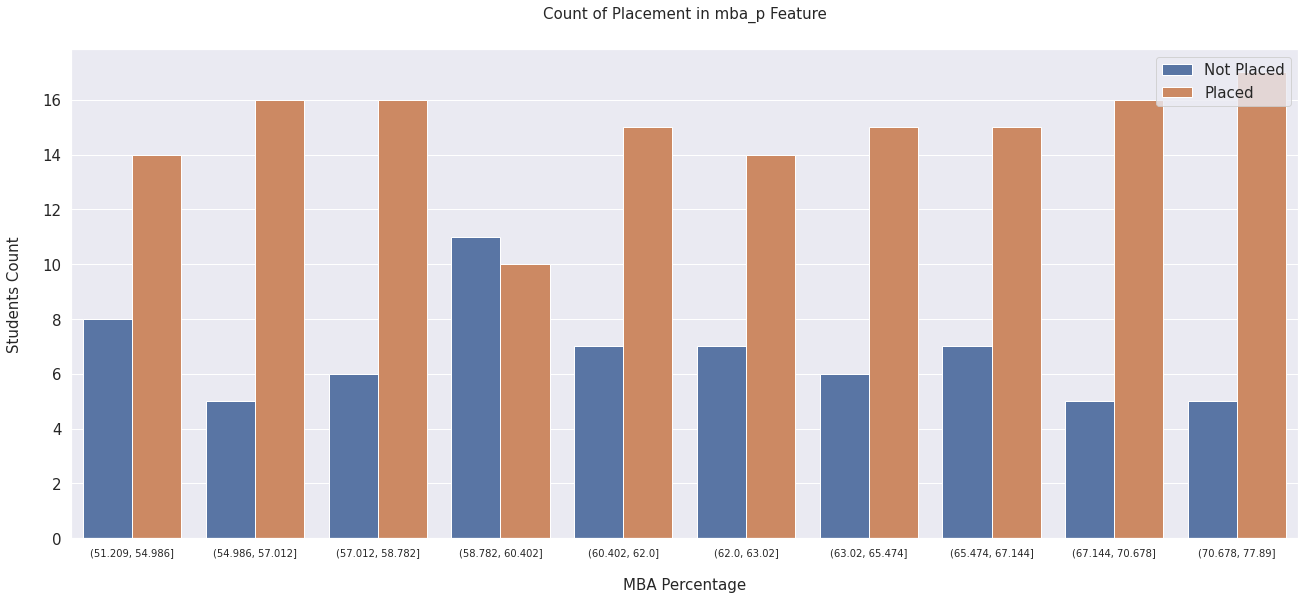

In [21]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="mba_p_bin", hue="status", data=df_campus)

plt.xlabel("MBA Percentage", size=15,
           labelpad=20)
plt.ylabel("Students Count", size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(["Not Placed", "Placed"], loc="upper right",
           prop={"size": 15})
plt.title("Count of Placement in {} Feature".format("mba_p"), 
          size=15, y=1.05)

plt.show()

## 4.3 Feature Transformation 

### 4.3.1 Label Encoding Non-Numerical Features

In [22]:
non_numeric_features = ["gender", "ssc_b", "hsc_b", "hsc_s",
                        "degree_t", "workex", "specialisation",
                        "ssc_p_bin", "hsc_p_bin", "degree_p_bin",
                        "etest_p_bin", "mba_p_bin"]

for feature in non_numeric_features:
    df_campus[feature] = LabelEncoder() \
                         .fit_transform(df_campus[feature])

In [23]:
df_campus

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,has_salary,ssc_p_bin,hsc_p_bin,degree_p_bin,etest_p_bin,mba_p_bin
0,1,1,67.00,1,91.00,1,1,58.00,2,0,...,1,58.80,1,270000.0,1,3,3,0,0,3
1,2,1,79.33,0,78.33,1,2,77.48,2,1,...,0,66.28,1,200000.0,1,6,3,5,6,7
2,3,1,65.00,0,68.00,0,0,64.00,0,0,...,0,57.80,1,250000.0,1,3,2,1,4,2
3,4,1,56.00,0,52.00,0,2,52.00,2,0,...,1,59.43,0,NaN,0,1,0,0,3,3
4,5,1,85.80,0,73.60,0,1,73.30,0,0,...,0,55.50,1,425000.0,1,7,3,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,...,0,74.49,1,400000.0,1,6,3,5,7,9
211,212,1,58.00,1,60.00,1,2,72.00,2,0,...,0,53.62,1,275000.0,1,1,0,4,4,0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,...,0,69.72,1,295000.0,1,3,2,4,1,8
213,214,0,74.00,1,66.00,1,1,58.00,0,0,...,1,60.23,1,204000.0,1,5,2,0,3,3


### 4.3.2 One-Hot Encoding the Categorical Features

In [24]:
categorical_features = ["ssc_b", "hsc_b", "hsc_s",
                        "degree_t"]
encoded_features = []

for feature in categorical_features:
    encoded_feat = OneHotEncoder() \
                   .fit_transform(df_campus[feature].values
                                  .reshape(-1, 1)).toarray()
    n = df_campus[feature].nunique()
    cols = ["{}_{}".format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_campus.index
    encoded_features.append(encoded_df)
    
df_campus = pd.concat([df_campus, *encoded_features], axis=1)

In [25]:
drop_cols = ["sl_no", "ssc_p", "ssc_b", "hsc_p", "hsc_b",
             "hsc_s", "degree_p", "degree_t", "etest_p", "mba_p",
             "salary", "has_salary"]

df_campus.drop(columns=drop_cols, inplace=True)
df_campus.head()

,gender,workex,specialisation,status,ssc_p_bin,hsc_p_bin,degree_p_bin,etest_p_bin,mba_p_bin,ssc_b_1,ssc_b_2,hsc_b_1,hsc_b_2,hsc_s_1,hsc_s_2,hsc_s_3,degree_t_1,degree_t_2,degree_t_3
0,1,0,1,1,3,3,0,0,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,1,6,3,5,6,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,0,1,3,2,1,4,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,1,0,1,0,0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0,0,1,7,3,5,7,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# 5. Model

In [26]:
X = df_campus.drop("status", axis=1)
y = df_campus["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5.1 Random Forest

In [36]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix: {}\n".format(cm))
print("Classification report: \n",
      classification_report(y_test, y_pred))

Confusion matrix: [[17 10]
 [ 3 35]]

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.78      0.92      0.84        38

    accuracy                           0.80        65
   macro avg       0.81      0.78      0.78        65
weighted avg       0.81      0.80      0.79        65



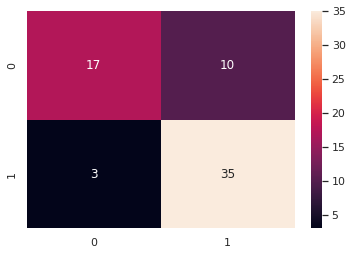

In [37]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()